In [4]:
import os
from bs4 import BeautifulSoup, NavigableString, Tag 

from nltk.util import ngrams
from nltk import word_tokenize

import json
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as plt
import seaborn as sns

import collections
import csv

from datetime import datetime
from pytz import timezone

print "imported"

imported


In [18]:
# IMPORTS SPECIFIC TO TOPIC MODELING

import langid
import nltk
import re
import time
from collections import defaultdict
from configparser import ConfigParser
from gensim import corpora, models, similarities
from nltk.tokenize import RegexpTokenizer
from string import digits
import pyLDAvis.gensim

print "imported"

imported


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

print "imported"

imported


In [14]:
stringdir = 'digitalSTS/papers/strings/'

filenames = [stringdir + filename for filename in os.listdir(stringdir) if not filename.startswith('.')]
filenames

['digitalSTS/papers/strings/02_Parmiggiani_Monteiro.csv',
 'digitalSTS/papers/strings/03_Allhutter.csv',
 'digitalSTS/papers/strings/04_Camus_Vinck.csv',
 'digitalSTS/papers/strings/05_Lynch.csv',
 'digitalSTS/papers/strings/06_Vertesi.csv',
 'digitalSTS/papers/strings/07_Kerisadou.csv',
 'digitalSTS/papers/strings/08_Couture.csv',
 'digitalSTS/papers/strings/09_Dunbar_Hester.csv',
 'digitalSTS/papers/strings/10_Hawthorne.csv',
 'digitalSTS/papers/strings/11_Chan.csv',
 'digitalSTS/papers/strings/12_Poster.csv',
 'digitalSTS/papers/strings/13_Ilten_McInerney.csv',
 'digitalSTS/papers/strings/14_Nemer.csv',
 'digitalSTS/papers/strings/15_Erikson.csv',
 'digitalSTS/papers/strings/16_Toth.csv',
 'digitalSTS/papers/strings/17_Cohn.csv',
 'digitalSTS/papers/strings/18_Seaver.csv',
 'digitalSTS/papers/strings/19_Stark.csv',
 'digitalSTS/papers/strings/20_Ribes.csv',
 'digitalSTS/papers/strings/21_Cardoso_Llach.csv',
 'digitalSTS/papers/strings/22_Venturini.csv',
 'digitalSTS/papers/strings/2

### Vectorize into document term matrix

In [15]:
vectorizer = CountVectorizer(input='filename')               
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 
vocab = vectorizer.get_feature_names()

### Convert to NumPy Array

In [17]:
# for reference, note the current class of `dtm`  
type(dtm)                                         
dtm = dtm.toarray()  # convert to a regular array 
vocab = np.array(vocab)

### Calculate cosine similarity

In [20]:
dist = 1 - cosine_similarity(dtm)
np.round(dist, 2)

### 2D Plot

In [23]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

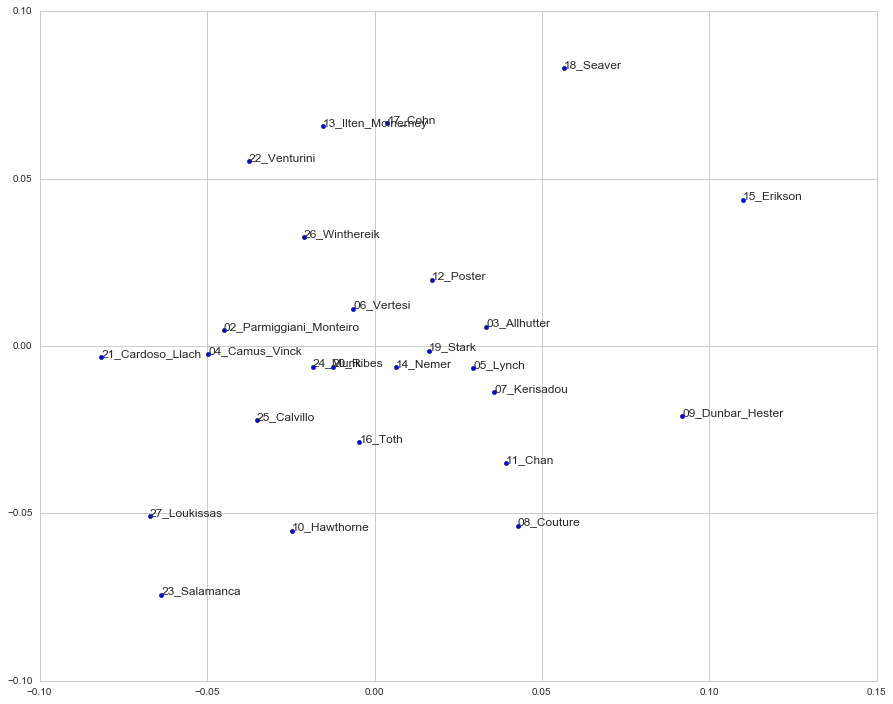

In [44]:
sns.set_style("whitegrid")

names = [os.path.basename(fn).replace('.csv', '') for fn in filenames]

xs, ys = pos[:, 0], pos[:, 1]

plt.figure(figsize=(15,12))
           
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name, fontsize=12)

plt.show()

### 3D Plot

In [34]:
three_mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = three_mds.fit_transform(dist)

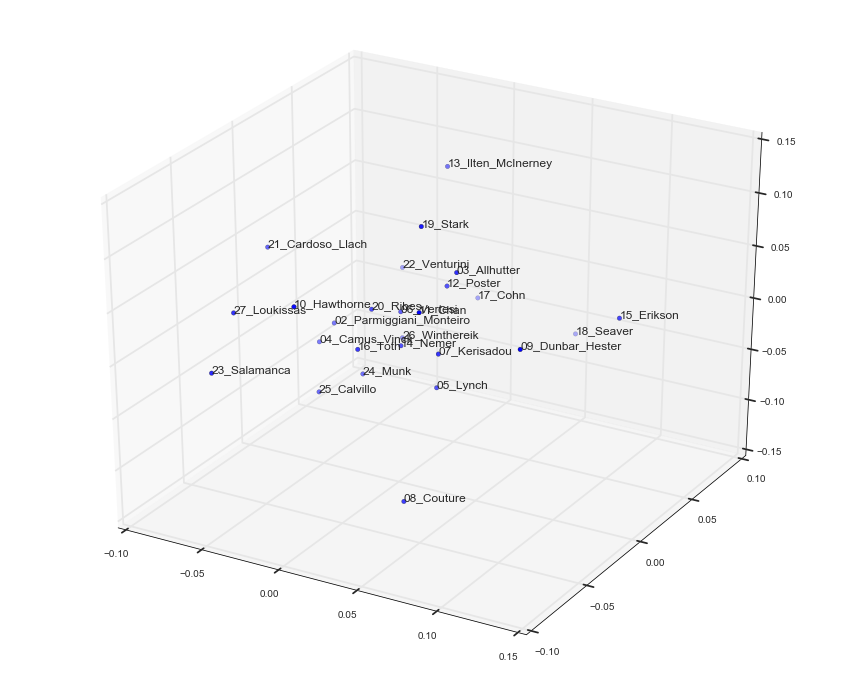

In [40]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(15,12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s, fontsize=12)
    
plt.show()

### Dendrogram

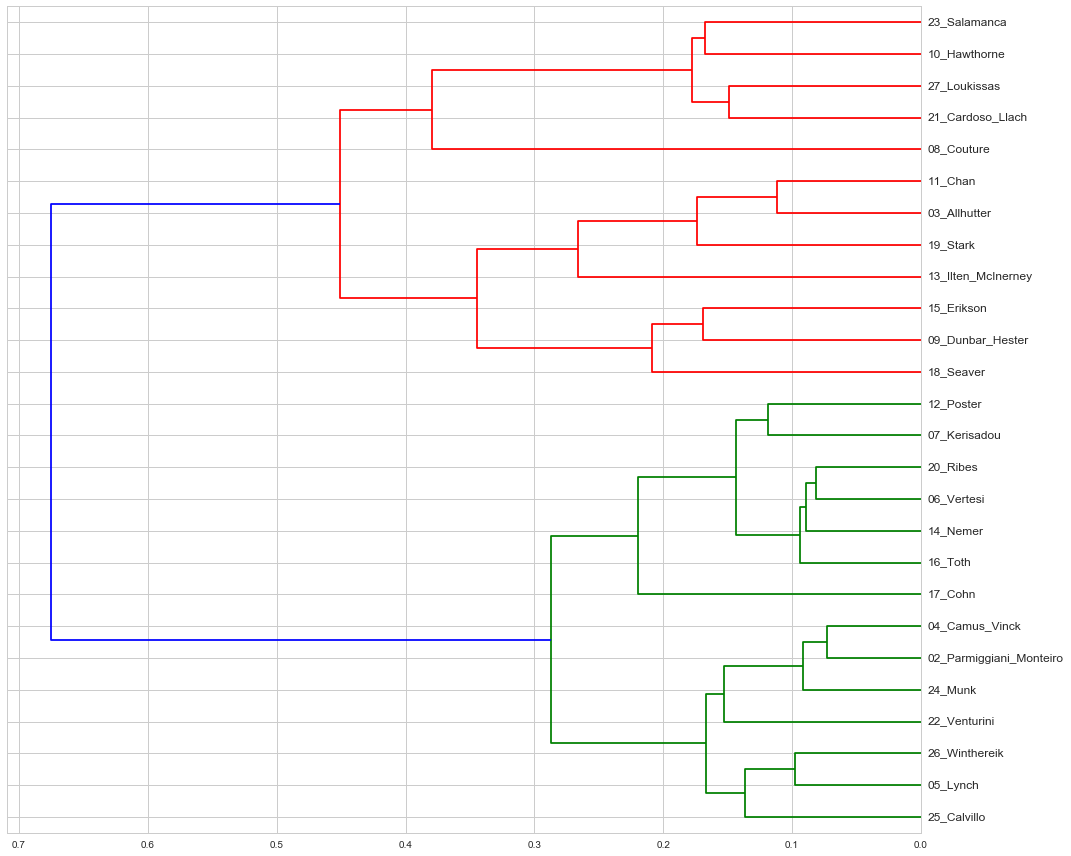

In [52]:
linkage_matrix = ward(dist)
plt.figure(figsize=(15,12))

dendrogram(linkage_matrix, orientation="left", labels=names, leaf_font_size=12)
plt.tight_layout()
plt.show()